In [ ]:
!git clone https://github.com/jorgpg5/synthetic_data.git

fatal: destination path 'synthetic_data' already exists and is not an empty directory.


# Synthesize Time Series data from your own DataFrame

This Blueprint demonstrates how to create synthetic time series data with Gretel. We assume that within the dataset
there is at least:

1) A specific column holding time data points

2) One or more columns that contain measurements or numerical observations for each point in time.

For this Blueprint, we will generate a very simple sine wave as our time series data.

In [ ]:
%%capture

!pip install pyyaml smart_open numpy pandas optuna matplotlib
!pip install -U gretel-client

In [ ]:
# Specify your Gretel API key

from getpass import getpass
import pandas as pd
from gretel_client import configure_session, ClientConfig

pd.set_option('max_colwidth', None)

configure_session(ClientConfig(api_key=getpass(prompt="Enter Gretel API key"), 
                               endpoint="https://api.gretel.cloud"))

Enter Gretel API key··········


In [ ]:
# Create a simple timeseries with a sine and cosine wave

import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

train_df = pd.read_csv('/content/synthetic_data/example_dataset.csv')

train_df

,EDA,ECG,Label,Left Pupil Diameter (m),Right Pupil Diameter (m),Eye Opening Left,Eye Opening Right,PERCLOS Value,Blinking
0,4.3114,-0.1822,2,0.002089,0.002242,0.4522,0.4111,0.5904,0
1,4.3129,-0.1535,2,0.002101,0.002183,0.4679,0.4372,0.5904,0
2,4.3120,-0.1209,2,0.002115,0.002224,0.4489,0.4276,0.5903,0
3,4.3129,-0.0918,2,0.002274,0.002392,0.5027,0.4294,0.5902,0
4,4.3116,-0.0696,2,0.002195,0.002318,0.4237,0.4388,0.5902,0
...,...,...,...,...,...,...,...,...,...
17995,5.0606,-0.0341,2,0.002624,0.002474,0.1496,0.0798,0.4570,0
17996,5.0598,0.0034,2,0.002624,0.002474,0.1496,0.0949,0.4570,0
17997,5.0613,0.0277,2,0.002624,0.002474,0.1496,0.0974,0.4571,0
17998,5.0589,0.0610,2,0.002624,0.002474,0.1496,0.0834,0.4571,0


In [ ]:
train_df['idx_col'] = train_df.index
train_df

,EDA,ECG,Label,Left Pupil Diameter (m),Right Pupil Diameter (m),Eye Opening Left,Eye Opening Right,PERCLOS Value,Blinking,idx_col
0,4.3114,-0.1822,2,0.002089,0.002242,0.4522,0.4111,0.5904,0,0
1,4.3129,-0.1535,2,0.002101,0.002183,0.4679,0.4372,0.5904,0,1
2,4.3120,-0.1209,2,0.002115,0.002224,0.4489,0.4276,0.5903,0,2
3,4.3129,-0.0918,2,0.002274,0.002392,0.5027,0.4294,0.5902,0,3
4,4.3116,-0.0696,2,0.002195,0.002318,0.4237,0.4388,0.5902,0,4
...,...,...,...,...,...,...,...,...,...,...
17995,5.0606,-0.0341,2,0.002624,0.002474,0.1496,0.0798,0.4570,0,17995
17996,5.0598,0.0034,2,0.002624,0.002474,0.1496,0.0949,0.4570,0,17996
17997,5.0613,0.0277,2,0.002624,0.002474,0.1496,0.0974,0.4571,0,17997
17998,5.0589,0.0610,2,0.002624,0.002474,0.1496,0.0834,0.4571,0,17998


In [ ]:

from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = make_subplots(rows=9, cols=1)

fig.append_trace(go.Scatter(
    y=train_df.EDA,
    name='EDA',
), row=1, col=1)

fig.append_trace(go.Scatter(
    y=train_df.ECG,
    name='ECG',
), row=2, col=1)

fig.append_trace(go.Scatter(
    y=train_df.Label,
    name='Label',
), row=3, col=1)

fig.append_trace(go.Scatter(
    y=train_df['Left Pupil Diameter (m)'],
    name='Left pupil diameter',
), row=4, col=1)

fig.append_trace(go.Scatter(
    y=train_df['Right Pupil Diameter (m)'],
    name='Right pupil diameter',
), row=5, col=1)

fig.append_trace(go.Scatter(
    y=train_df['Eye Opening Left'],
    name='Eye Opening Left',
), row=6, col=1)

fig.append_trace(go.Scatter(
    y=train_df['Eye Opening Right'],
    name='Eye Opening Right',
), row=7, col=1)

fig.append_trace(go.Scatter(
    y=train_df['PERCLOS Value'],
    name='PERCLOS',
), row=8, col=1)

fig.append_trace(go.Scatter(
    y=train_df.Blinking,
    name='Blink',
), row=9, col=1)

fig.update_layout(height=1200, width=1200, title_text="Individual channels")
fig.show()

# Data As-Is

This part of the code generates synthetic data using the time series task with the data as-is. The hyperparameters we found that work best have been included for this run.

INFO: Starting poller


{
    "uid": "611bef39755028bea1c4df0f",
    "model_name": "majestic-joyous-kangaroo",
    "runner_mode": "cloud",
    "user_id": "60e5e8fabff621712f746689",
    "project_id": "611bef375c56c5b6c5cfb1ff",
    "logs": null,
    "status_history": {
        "created": "2021-08-17T17:17:45.096378Z"
    },
    "last_modified": "2021-08-17T17:17:45.133027Z",
    "status": "created",
    "last_active_hb": null,
    "duration_minutes": null,
    "error_msg": null,
    "error_id": null,
    "traceback": null,
    "container_image": "074762682575.dkr.ecr.us-west-2.amazonaws.com/gretelai/synthetics@sha256:b3e13e4cef5ffebff4251a6cd838a879ce539b05c649e517e6c45a1ba1a0d431",
    "model_type": "synthetics",
    "config": {
        "schema_version": "1.0",
        "name": null,
        "models": [
            {
                "synthetics": {
                    "params": {
                        "field_delimiter": null,
                        "epochs": 100,
                        "batch_size": 64,
 

INFO: Status is created. Model creation has been queued.
INFO: Status is pending. A Gretel Cloud worker is being allocated to begin model creation.
INFO: Status is active. A worker has started creating your model!
2021-08-17T17:17:55.559321Z  Starting synthetic model training
2021-08-17T17:17:55.561204Z  Loading training data
2021-08-17T17:17:55.839914Z  Training data loaded
{
    "record_count": 18000,
    "field_count": 10
}
2021-08-17T17:18:02.320149Z  Creating semantic validators and preparing training data
2021-08-17T17:18:10.517246Z  Beginning ML model training
2021-08-17T17:18:39.949530Z  Training epoch completed
{
    "epoch": 0,
    "accuracy": 0.5108,
    "loss": 1.7195,
    "val_accuracy": 0,
    "val_loss": 0,
    "batch": 0
}
2021-08-17T17:18:43.190644Z  Training epoch completed
{
    "epoch": 1,
    "accuracy": 0.6084,
    "loss": 1.2318,
    "val_accuracy": 0,
    "val_loss": 0,
    "batch": 0
}
2021-08-17T17:18:46.359104Z  Training epoch completed
{
    "epoch": 2,
    

{
    "uid": "611bf2785a1892ae161c71fb",
    "model_name": null,
    "runner_mode": "cloud",
    "user_id": "60e5e8fabff621712f746689",
    "project_id": "611bef375c56c5b6c5cfb1ff",
    "logs": null,
    "status_history": {
        "created": "2021-08-17T17:31:36.004000Z"
    },
    "last_modified": "2021-08-17T17:31:36.105000Z",
    "status": "created",
    "last_active_hb": null,
    "duration_minutes": null,
    "error_msg": null,
    "error_id": null,
    "traceback": null,
    "container_image": "074762682575.dkr.ecr.us-west-2.amazonaws.com/gretelai/synthetics@sha256:b3e13e4cef5ffebff4251a6cd838a879ce539b05c649e517e6c45a1ba1a0d431",
    "model_id": "611bef39755028bea1c4df0f",
    "action": "generate",
    "config": {
        "data_source": "gretel_c246af31ec2248f897c7cdb62b20e0e7_idx_seeds.csv",
        "params": {
            "num_records": 18000,
            "max_invalid": 20000
        }
    }
}


INFO: Status is pending. A Gretel Cloud worker is being allocated to begin generating synthetic records.
INFO: Status is active. A worker has started!
2021-08-17T17:31:49.119073Z  Downloading model to worker
2021-08-17T17:31:49.416490Z  Checking for synthetic smart seeds
2021-08-17T17:31:49.649888Z  Loaded 18000 smart seeds for generation
2021-08-17T17:31:49.650872Z  Loading model
2021-08-17T17:31:51.248926Z  Generating records
{
    "num_records": 18000
}
2021-08-17T17:31:56.274621Z  Generation in progress
{
    "current_valid_count": 20,
    "current_invalid_count": 61,
    "new_valid_count": 20,
    "new_invalid_count": 61,
    "completion_percent": 0.11
}
2021-08-17T17:32:01.281725Z  Generation in progress
{
    "current_valid_count": 109,
    "current_invalid_count": 80,
    "new_valid_count": 89,
    "new_invalid_count": 19,
    "completion_percent": 0.61
}
2021-08-17T17:32:06.287947Z  Generation in progress
{
    "current_valid_count": 200,
    "current_invalid_count": 93,
    "

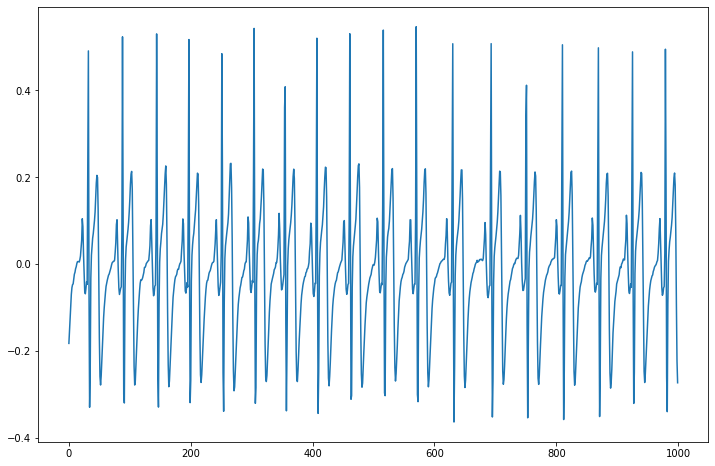

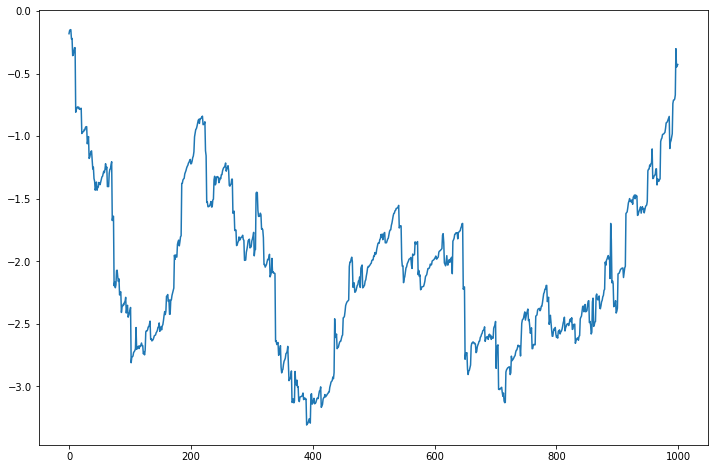

In [ ]:
from smart_open import open
import yaml

from gretel_client import create_project
from gretel_client.helpers import poll

train_df = pd.read_csv('/content/synthetic_data/example_dataset.csv')
train_df['idx_col'] = train_df.index

# Create a project and model configuration.
project = create_project(display_name="time-series-synthetic-data-as-is")

# Pull down the default synthetic config.  We will modify it slightly.
with open("https://raw.githubusercontent.com/gretelai/gretel-blueprints/main/config_templates/gretel/synthetics/default.yml", 'r') as stream:
    config = yaml.safe_load(stream)

# Here we create an object to specify the timeseries task.
time_field="idx_col"
#trend_fields=["EDA", "ECG", "Left Pupil Diameter (m)", "Right Pupil Diameter (m)", "Eye Opening Left", "Eye Opening Right", "PERCLOS Value", "Blinking"]
#trend_fields = ['ECG'] #Used to see if training a single column does better than training all of them
trend_fields=["EDA", "ECG", "Left Pupil Diameter (m)", "Right Pupil Diameter (m)", "Eye Opening Left", "Eye Opening Right", "PERCLOS Value"]

task = {
    'type': 'time_series',
    'attrs': {
        'time_field': time_field,
        'trend_fields': trend_fields
    }
}

config['models'][0]['synthetics']['task'] = task

config['models'][0]['synthetics']['params']['vocab_size'] = 28
config['models'][0]['synthetics']['params']['predict_batch_size'] = 1
config['models'][0]['synthetics']['params']['reset_states'] = True
config['models'][0]['synthetics']['params']['overwrite'] = True
config['models'][0]['synthetics']['params']['validation_split'] = False #Our validation split does not support time series tasks yet. Updated config will be uploaded soon.
config['models'][0]['synthetics']['params']['dropout_rate'] = .5
config['models'][0]['synthetics']['params']['gen_temp'] = .898
config['models'][0]['synthetics']['params']['learning_rate'] = .0035
config['models'][0]['synthetics']['params']['rnn_units'] = 64

model = project.create_model_obj(model_config=config)

# Get a csv to work with, just dump out the train_df.
train_df.to_csv('train.csv', index=False)
model.data_source = 'train.csv'

# Upload the training data.  Train the model.
model.submit(upload_data_source=True)

poll(model)

# Use the model to generate synthetic data.
record_handler = model.create_record_handler_obj()

# For time series data we dump out the date column to seed the record handler.
train_df['idx_col'].to_csv('idx_seeds.csv', index=False)

record_handler.submit(
    action="generate",
    params={"num_records": 18000, "max_invalid": 20000},
    data_source='idx_seeds.csv',
    upload_data_source=True
)

poll(record_handler)

synthetic = pd.read_csv(record_handler.get_artifact_link("data"), compression='gzip')

synthetic.head()

train_df.ECG.head(1000).plot(figsize=(12, 8))
plt.show()

synthetic.ECG.head(1000).plot(figsize=(12, 8))
plt.show()

# Data Scaled

This section scales the data. The reason we scaled the data here is to avoid the invalid lines error, originally. But it could also help the LSTM find patterns more easily.

INFO: Starting poller


{
    "uid": "611bfb0c4eb95d27ec428331",
    "model_name": "joyous-gleaming-raccoon",
    "runner_mode": "cloud",
    "user_id": "60e5e8fabff621712f746689",
    "project_id": "611bfb08f43f307f4bedd455",
    "logs": null,
    "status_history": {
        "created": "2021-08-17T18:08:12.453115Z"
    },
    "last_modified": "2021-08-17T18:08:12.487532Z",
    "status": "created",
    "last_active_hb": null,
    "duration_minutes": null,
    "error_msg": null,
    "error_id": null,
    "traceback": null,
    "container_image": "074762682575.dkr.ecr.us-west-2.amazonaws.com/gretelai/synthetics@sha256:b3e13e4cef5ffebff4251a6cd838a879ce539b05c649e517e6c45a1ba1a0d431",
    "model_type": "synthetics",
    "config": {
        "schema_version": "1.0",
        "name": null,
        "models": [
            {
                "synthetics": {
                    "params": {
                        "field_delimiter": null,
                        "epochs": 100,
                        "batch_size": 64,
  

INFO: Status is created. Model creation has been queued.
INFO: Status is pending. A Gretel Cloud worker is being allocated to begin model creation.
INFO: Status is active. A worker has started creating your model!
2021-08-17T18:08:22.594308Z  Starting synthetic model training
2021-08-17T18:08:22.596146Z  Loading training data
2021-08-17T18:08:22.865294Z  Training data loaded
{
    "record_count": 18000,
    "field_count": 10
}
2021-08-17T18:08:29.011607Z  Creating semantic validators and preparing training data
2021-08-17T18:08:36.810141Z  Beginning ML model training
2021-08-17T18:08:51.386229Z  Training epoch completed
{
    "epoch": 0,
    "accuracy": 0.5871,
    "loss": 1.3344,
    "val_accuracy": 0,
    "val_loss": 0,
    "batch": 0
}
2021-08-17T18:08:53.597139Z  Training epoch completed
{
    "epoch": 1,
    "accuracy": 0.6806,
    "loss": 0.9857,
    "val_accuracy": 0,
    "val_loss": 0,
    "batch": 0
}
2021-08-17T18:08:55.784707Z  Training epoch completed
{
    "epoch": 2,
    

{
    "uid": "611bfccbf959984eb5749ccc",
    "model_name": null,
    "runner_mode": "cloud",
    "user_id": "60e5e8fabff621712f746689",
    "project_id": "611bfb08f43f307f4bedd455",
    "logs": null,
    "status_history": {
        "created": "2021-08-17T18:15:38.976000Z"
    },
    "last_modified": "2021-08-17T18:15:39.049000Z",
    "status": "created",
    "last_active_hb": null,
    "duration_minutes": null,
    "error_msg": null,
    "error_id": null,
    "traceback": null,
    "container_image": "074762682575.dkr.ecr.us-west-2.amazonaws.com/gretelai/synthetics@sha256:b3e13e4cef5ffebff4251a6cd838a879ce539b05c649e517e6c45a1ba1a0d431",
    "model_id": "611bfb0c4eb95d27ec428331",
    "action": "generate",
    "config": {
        "data_source": "gretel_f6f96dfd5d204489afe9080f854ae002_idx_seeds.csv",
        "params": {
            "num_records": 18000,
            "max_invalid": 20000
        }
    }
}


INFO: Status is created. A Record generation job has been queued.
INFO: Status is pending. A Gretel Cloud worker is being allocated to begin generating synthetic records.
INFO: Status is active. A worker has started!
2021-08-17T18:15:49.453257Z  Downloading model to worker
2021-08-17T18:15:49.648654Z  Checking for synthetic smart seeds
2021-08-17T18:15:49.879605Z  Loaded 18000 smart seeds for generation
2021-08-17T18:15:49.880580Z  Loading model
2021-08-17T18:15:51.466218Z  Generating records
{
    "num_records": 18000
}
2021-08-17T18:15:56.490677Z  Generation in progress
{
    "current_valid_count": 51,
    "current_invalid_count": 71,
    "new_valid_count": 51,
    "new_invalid_count": 71,
    "completion_percent": 0.28
}
2021-08-17T18:16:01.496796Z  Generation in progress
{
    "current_valid_count": 149,
    "current_invalid_count": 118,
    "new_valid_count": 98,
    "new_invalid_count": 47,
    "completion_percent": 0.83
}
2021-08-17T18:16:06.502592Z  Generation in progress
{
   

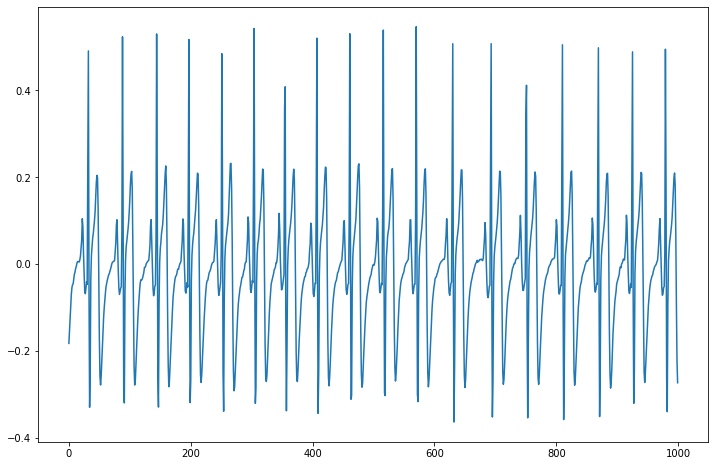

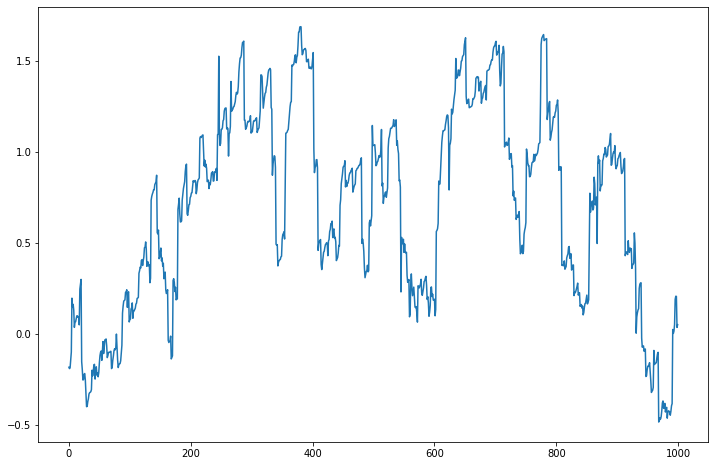

In [ ]:
from smart_open import open
import yaml

from gretel_client import create_project
from gretel_client.helpers import poll

train_df = pd.read_csv('/content/synthetic_data/example_dataset.csv')
train_df['idx_col'] = train_df.index

# Create a project and model configuration.
project = create_project(display_name="time-series-synthetic-data-scaled")

# Pull down the default synthetic config.  We will modify it slightly.
with open("https://raw.githubusercontent.com/gretelai/gretel-blueprints/main/config_templates/gretel/synthetics/default.yml", 'r') as stream:
    config = yaml.safe_load(stream)

# Here we create an object to specify the timeseries task.
time_field="idx_col"
#trend_fields=["EDA", "ECG", "Left Pupil Diameter (m)", "Right Pupil Diameter (m)", "Eye Opening Left", "Eye Opening Right", "PERCLOS Value", "Blinking"]
#trend_fields = ['ECG'] #Used to check if an individual column would be better than all the columns
trend_fields=["EDA", "ECG", "Left Pupil Diameter (m)", "Right Pupil Diameter (m)", "Eye Opening Left", "Eye Opening Right", "PERCLOS Value"]

#modifying dataset: make sure to scale the datapoints appropriately, so the LSTM does not create more or less precision for each data point.
#train_df = train_df[['idx_col', 'ECG']]
#train_df["ECG"] = train_df["ECG"] * 1e4
train_df[["EDA", "ECG", "Eye Opening Left", "Eye Opening Right", "PERCLOS Value"]] = train_df[["EDA", "ECG", "Eye Opening Left", "Eye Opening Right", "PERCLOS Value"]] * 1e4
train_df[["Left Pupil Diameter (m)", "Right Pupil Diameter (m)"]] = train_df[["Left Pupil Diameter (m)", "Right Pupil Diameter (m)"]] * 1e6
train_df = train_df.astype(int)

task = {
    'type': 'time_series',
    'attrs': {
        'time_field': time_field,
        'trend_fields': trend_fields
    }
}

config['models'][0]['synthetics']['task'] = task
config['models'][0]['synthetics']['params']['vocab_size'] = 18
config['models'][0]['synthetics']['params']['predict_batch_size'] = 1
config['models'][0]['synthetics']['params']['reset_states'] = False
config['models'][0]['synthetics']['params']['overwrite'] = True
config['models'][0]['synthetics']['params']['validation_split'] = False #Our validation split does not support time series tasks yet. Updated config will be uploaded soon.
config['models'][0]['synthetics']['params']['dropout_rate'] = .629
config['models'][0]['synthetics']['params']['gen_temp'] = 1.0
config['models'][0]['synthetics']['params']['learning_rate'] = .0099
config['models'][0]['synthetics']['params']['rnn_units'] = 64

model = project.create_model_obj(model_config=config)

# Get a csv to work with, just dump out the train_df.
train_df.to_csv('train.csv', index=False)
model.data_source = 'train.csv'

# Upload the training data.  Train the model.
model.submit(upload_data_source=True)

poll(model)

# Use the model to generate synthetic data.
record_handler = model.create_record_handler_obj()

# For time series data we dump out the date column to seed the record handler.
train_df['idx_col'].to_csv('idx_seeds.csv', index=False)

record_handler.submit(
    action="generate",
    params={"num_records": 18000, "max_invalid": 20000},
    data_source='idx_seeds.csv',
    upload_data_source=True
)

poll(record_handler)

synthetic_scaled = pd.read_csv(record_handler.get_artifact_link("data"), compression='gzip')

synthetic_scaled.head()

#Converts train_df back to the original values for evaluation purposes.
#train_df["ECG"] = train_df["ECG"] * 1e-4 #Used for an individual column.
train_df[["EDA", "ECG", "Eye Opening Left", "Eye Opening Right", "PERCLOS Value"]] = train_df[["EDA", "ECG", "Eye Opening Left", "Eye Opening Right", "PERCLOS Value"]] * 1e-4
train_df[["Left Pupil Diameter (m)", "Right Pupil Diameter (m)"]] = train_df[["Left Pupil Diameter (m)", "Right Pupil Diameter (m)"]] * 1e-6

synthetic_scaled[["EDA", "ECG", "Eye Opening Left", "Eye Opening Right", "PERCLOS Value"]] = synthetic_scaled[["EDA", "ECG", "Eye Opening Left", "Eye Opening Right", "PERCLOS Value"]] * 1e-4
synthetic_scaled[["Left Pupil Diameter (m)", "Right Pupil Diameter (m)"]] = synthetic_scaled[["Left Pupil Diameter (m)", "Right Pupil Diameter (m)"]] * 1e-6

train_df.ECG.head(1000).plot(figsize=(12, 8))
plt.show()

synthetic_scaled.ECG.head(1000).plot(figsize=(12, 8))
plt.show()

# Taking first order difference of the data

One last approach we tried is to take the first order difference of the trend columns. This is a traditional way of trying to model time series data. For this task, we utilize the seeding task instead of the time series task, since we already did some feature engineering on the time series dataset.

In [ ]:
from smart_open import open
import yaml

from gretel_client import create_project
from gretel_client.helpers import poll

train_df = pd.read_csv('/content/synthetic_data/example_dataset.csv')
train_df['idx_col'] = train_df.index

# Create a project and model configuration.
project = create_project(display_name="time-series-synthetic-data-diff")

# Pull down the default synthetic config.  We will modify it slightly.
with open("https://raw.githubusercontent.com/gretelai/gretel-blueprints/main/config_templates/gretel/synthetics/default.yml", 'r') as stream:
    config = yaml.safe_load(stream)

# Here we create an object to specify the timeseries task.
fields=["idx_col"]

#Leaving these here, in case you want to seed with the actual fields.
#trend_fields=["EDA", "ECG", "Left Pupil Diameter (m)", "Right Pupil Diameter (m)", "Eye Opening Left", "Eye Opening Right", "PERCLOS Value", "Blinking"]
#trend_fields = ['ECG'] #Used for individual experiments
#trend_fields=["EDA", "ECG", "Left Pupil Diameter (m)", "Right Pupil Diameter (m)", "Eye Opening Left", "Eye Opening Right", "PERCLOS Value"]


#modifying dataset
#train_df = train_df[['idx_col', 'ECG']] #Used for single column experiments
diff_df = train_df.copy(deep = True)
for col in trend_fields:
  diff_df[col] = diff_df[col].diff()
  diff_df[col].loc[[0]] = 0.0

task = {
    'type': 'seed',
    'attrs': {
        'fields': fields
    }
}

config['models'][0]['synthetics']['task'] = task
config['models'][0]['synthetics']['params']['vocab_size'] = 28
config['models'][0]['synthetics']['params']['predict_batch_size'] = 1
config['models'][0]['synthetics']['params']['reset_states'] = True
config['models'][0]['synthetics']['params']['overwrite'] = True
config['models'][0]['synthetics']['params']['validation_split'] = False #Our validation split does not support time series tasks yet. Updated config will be uploaded soon.
config['models'][0]['synthetics']['params']['dropout_rate'] = .51
config['models'][0]['synthetics']['params']['gen_temp'] = 1.05
config['models'][0]['synthetics']['params']['learning_rate'] = .0099
config['models'][0]['synthetics']['params']['rnn_units'] = 192

model = project.create_model_obj(model_config=config)

# Get a csv to work with, just dump out the train_df.
train_df.to_csv('train.csv', index=False)
model.data_source = 'train.csv'

# Upload the training data.  Train the model.
model.submit(upload_data_source=True)

poll(model)

# Use the model to generate synthetic data.
record_handler = model.create_record_handler_obj()

# For time series data we dump out the date column to seed the record handler.
train_df['idx_col'].to_csv('idx_seeds.csv', index=False)

#    data_source='idx_seeds.csv', (taken out for experimentation)
record_handler.submit(
    action="generate",
    params={"num_records": 18000, "max_invalid": 20000},
    data_source='idx_seeds.csv',
    upload_data_source=True
)

poll(record_handler)

synthetic_diff = pd.read_csv(record_handler.get_artifact_link("data"), compression='gzip')

synthetic_diff.head()

for col, initial_val in zip(trend_fields, list(train_df[trend_fields].loc[[0]].values[0])):
  synthetic_diff[col].loc[[0]] = initial_val
  synthetic_diff[col] = synthetic_diff[col].cumsum()

train_df.ECG.head(1000).plot(figsize=(12, 8))
plt.show()

synthetic_diff.ECG.head(1000).plot(figsize=(12, 8))
plt.show()

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

INFO: Starting poller


{
    "uid": "611c003c59abedc0663dfe96",
    "model_name": "brawny-wacky-kangaroo",
    "runner_mode": "cloud",
    "user_id": "60e5e8fabff621712f746689",
    "project_id": "611c003178ea958125e95213",
    "logs": null,
    "status_history": {
        "created": "2021-08-17T18:30:20.550921Z"
    },
    "last_modified": "2021-08-17T18:30:20.802418Z",
    "status": "created",
    "last_active_hb": null,
    "duration_minutes": null,
    "error_msg": null,
    "error_id": null,
    "traceback": null,
    "container_image": "074762682575.dkr.ecr.us-west-2.amazonaws.com/gretelai/synthetics@sha256:b3e13e4cef5ffebff4251a6cd838a879ce539b05c649e517e6c45a1ba1a0d431",
    "model_type": "synthetics",
    "config": {
        "schema_version": "1.0",
        "name": null,
        "models": [
            {
                "synthetics": {
                    "params": {
                        "field_delimiter": null,
                        "epochs": 100,
                        "batch_size": 64,
    

INFO: Status is pending. A Gretel Cloud worker is being allocated to begin model creation.
INFO: Status is active. A worker has started creating your model!
2021-08-17T18:30:34.263873Z  Starting synthetic model training
2021-08-17T18:30:34.265717Z  Loading training data
2021-08-17T18:30:34.546786Z  Training data loaded
{
    "record_count": 18000,
    "field_count": 10
}
2021-08-17T18:30:40.865849Z  Creating semantic validators and preparing training data
2021-08-17T18:30:49.046228Z  Beginning ML model training
2021-08-17T18:31:08.471592Z  Training epoch completed
{
    "epoch": 0,
    "accuracy": 0.4486,
    "loss": 1.6666,
    "val_accuracy": 0,
    "val_loss": 0,
    "batch": 0
}
2021-08-17T18:31:12.095307Z  Training epoch completed
{
    "epoch": 1,
    "accuracy": 0.5694,
    "loss": 1.1823,
    "val_accuracy": 0,
    "val_loss": 0,
    "batch": 0
}
2021-08-17T18:31:15.715238Z  Training epoch completed
{
    "epoch": 2,
    "accuracy": 0.5892,
    "loss": 1.1194,
    "val_accuracy

{
    "uid": "611c02a134d9f0ec32278b81",
    "model_name": null,
    "runner_mode": "cloud",
    "user_id": "60e5e8fabff621712f746689",
    "project_id": "611c003178ea958125e95213",
    "logs": null,
    "status_history": {
        "created": "2021-08-17T18:40:32.894000Z"
    },
    "last_modified": "2021-08-17T18:40:33.102000Z",
    "status": "created",
    "last_active_hb": null,
    "duration_minutes": null,
    "error_msg": null,
    "error_id": null,
    "traceback": null,
    "container_image": "074762682575.dkr.ecr.us-west-2.amazonaws.com/gretelai/synthetics@sha256:b3e13e4cef5ffebff4251a6cd838a879ce539b05c649e517e6c45a1ba1a0d431",
    "model_id": "611c003c59abedc0663dfe96",
    "action": "generate",
    "config": {
        "data_source": "gretel_bd7d0beb8ac240fc893a81c9004e6e78_idx_seeds.csv",
        "params": {
            "num_records": 18000,
            "max_invalid": 20000
        }
    }
}


INFO: Status is pending. A Gretel Cloud worker is being allocated to begin generating synthetic records.
INFO: Status is active. A worker has started!
2021-08-17T18:40:46.333647Z  Downloading model to worker
2021-08-17T18:40:46.689857Z  Checking for synthetic smart seeds
2021-08-17T18:40:47.008566Z  Loaded 18000 smart seeds for generation
2021-08-17T18:40:47.009469Z  Loading model
2021-08-17T18:40:48.595555Z  Generating records
{
    "num_records": 18000
}
2021-08-17T18:40:53.620762Z  Generation in progress
{
    "current_valid_count": 14,
    "current_invalid_count": 110,
    "new_valid_count": 14,
    "new_invalid_count": 110,
    "completion_percent": 0.08
}
2021-08-17T18:40:58.628505Z  Generation in progress
{
    "current_valid_count": 42,
    "current_invalid_count": 245,
    "new_valid_count": 28,
    "new_invalid_count": 135,
    "completion_percent": 0.23
}
2021-08-17T18:41:03.633875Z  Generation in progress
{
    "current_valid_count": 112,
    "current_invalid_count": 314,
 

TypeError: ignored

# Hyperparameter Tuning

Our lead machine learning researcher, Amy, found this fantastic library called Optuna to help us tune the configs for your use case. Feel free to take this code, and play with it to find new params! This helped us make sure that the errors you were seeing went away.

In [ ]:

def objective(trial: optuna.Trial):
    
    config['models'][0]['synthetics']['params']['vocab_size'] = trial.suggest_int(name="vocab_size", low=18, high=38, step=10)
    config['models'][0]['synthetics']['params']['rnn_units'] = trial.suggest_int(name="rnn_units", low=64, high=1024, step=64)
    config['models'][0]['synthetics']['params']['dropout_rate'] = trial.suggest_float("dropout_rate", .1, .75)
    config['models'][0]['synthetics']['params']['gen_temp'] = trial.suggest_float("gen_temp", .8, 1.2)
    config['models'][0]['synthetics']['params']['learning_rate'] = trial.suggest_float("learning_rate",  .001, 0.01, log=True)
    config['models'][0]['synthetics']['params']['reset_states'] = trial.suggest_categorical(
        "reset_states", choices=[True, False])
        
    seconds = int(time.time())
    project_name = "Tuning Experiment" + str(seconds)
    project = create_project(display_name=project_name)
    
    model = project.create_model_obj(model_config=config)

    # Get a csv to work with, just dump out the train_df.
    train_df.to_csv('train.csv', index=False)
    model.data_source = 'train.csv'

    # Upload the training data.  Train the model.
    model.submit(upload_data_source=True)

    status = "active"
    sqs = 0
    while status == "active":
        #Sleep a bit here
        time.sleep(60)
        models = []
        for model in project.search_models():
            ms = model.__dict__['_data']['model']
            ms = {key: ms[key] for key in ['model_name', 'model_type', 'status'] }
            status = ms["status"]
            print("Status is: " + status)
            if status == "completed":
                report = model.peek_report()
                if report:
                    sqs = report['synthetic_data_quality_score']['score']
                    print("Retrieved report sqs: " + str(sqs))
                else:
                    sqs = 0
            elif status == "error":
                sqs = 0
            
    return sqs

In [ ]:
# Create study that maximizes


study = optuna.create_study(direction="maximize")

# Start optimizing with however many trials you want
# You can do just one to see that it works, and then use the cells below
# to run more trials on the same study

study.optimize(objective, n_trials=20)

print(f"Optimized SQS: {study.best_value:.5f}")

print("Best params:")
for key, value in study.best_params.items():
    print(f"\t{key}: {value}")